In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time
from matplotlib.gridspec import GridSpec

In [10]:
import sklearn
sklearn.__version__

'1.1.3'

In [11]:
sns.set_theme(style="white", palette=sns.husl_palette(l=.4, n_colors=3), font_scale=1.5, context="paper")

In [12]:
newLabels_clinical = {
    "the_main_reason_for_hospital_admission":"reason for admission",
    "saturation_measured_based_on…":"saturation - measurement",
    "ferritin_admission_µg/L":"ferritin",
    "ldh_admission_µkat/L":"LDH",
    "xray_admission_pathological_n/y":"xray - pathological",
    "xray_admission_thickenings": "xray - thickenings",
    "saturation_%": "saturation - %",
    "crp_admission_mg/L": "CRP",
    "2425-dihydrolanosterol":"24,25-dihydrolanosterol"
}

# Feature importances

In [13]:
def evaluate_fi(df_importances):
    df_importances_sf = df_importances.copy()  
    df_importances_sf["n"] = np.sum(df_importances_sf.iloc[:,1:-1] > 0, axis = 1) 
    N = len(df_importances_sf.columns) - 3
    df_importances_sf["importance"] = df_importances_sf["n"]/N    
    return df_importances_sf

In [14]:
df_fi = pd.DataFrame()

bestModels = {"T1":"rfc", 
                "clinical":"gnb",
              "clinical_T1":"rfc"}

for dataset, model in bestModels.items():
    if dataset == "T1": 
        timepoint = "12_sterol_discoveryValidation_corrected" 
        fs = "iterativeBoruta"
    else: timepoint = "12_uponAdmission"
    if dataset == "clinical_T1":
        fs = "clinical+bestSterols"
    if dataset == "clinical": 
        fs = "boruta"

    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/importances_test_{model}.csv") 
    df = evaluate_fi(df)
    df["varSet"] = dataset
    df_fi = pd.concat([df_fi, df], axis=0)

T1 rfc
clinical gnb
clinical_T1 rfc


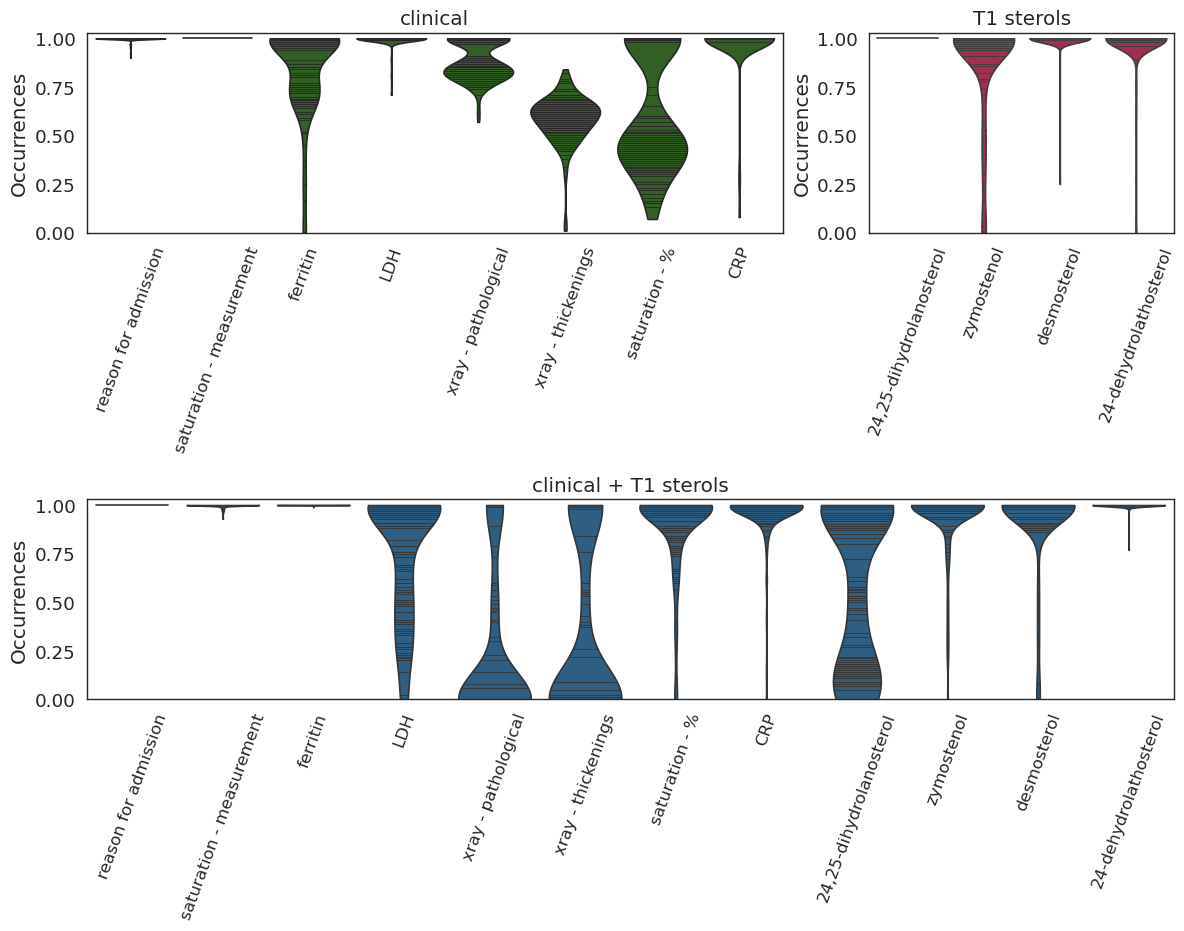

In [31]:
df_fi = pd.DataFrame()

bestModels = {"T1":"rfc", 
              "clinical":"gnb",
              "clinical_T1":"rfc"}
titles =  {"T1":"T1 sterols",
            "clinical":"clinical",
            "clinical_T1":"clinical + T1 sterols"}

fig = plt.figure(figsize=(12,12))  
gs = GridSpec(3,3, figure=fig)
ax1 = fig.add_subplot(gs[0, -3:-1])
ax2 = fig.add_subplot(gs[0, -1])
ax3 = fig.add_subplot(gs[1, :])


i = 0
for bestMod, ax in zip(bestModels.items(), [ax2,ax1,ax3]):
    dataset = bestMod[0]
    model = bestMod[1]

    if dataset == "T1": 
        timepoint = "12_sterol_discoveryValidation_corrected" 
        fs = "iterativeBoruta"
    else: timepoint = "12_uponAdmission"
    if dataset == "clinical_T1":
        fs = "clinical+bestSterols"
    if dataset == "clinical": 
        fs = "boruta"

    print(dataset, model)

    df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/importances_test_{model}.csv") 
    df = evaluate_fi(df)
   
    df_importances_sf_model = df.drop("model", axis=1)
    df_importances_sf_model["feature"] = df_importances_sf_model["feature"].replace(newLabels_clinical)
    ax = sns.violinplot(data=df_importances_sf_model, inner="stick", ax=ax, x="feature", y="importance", cut=0, scale="width", color=sns.husl_palette(l=.4, n_colors=3)[i])    
    ax.set_ylabel("Occurrences")    #axes[index]
    ax.tick_params(axis='x', rotation=70, labelsize=12)
    ax.set_xlabel("")
    ax.set_ylim(0,1.03)
    #ax.set_xlim(-.5,11.5)
    i+=1
    ax.set_title(titles[dataset])
plt.tight_layout()
fig.savefig("../figures/featureImportances.png", dpi=300)

In [ ]:
# fig, axes = plt.subplots(1, 1, figsize=(15,5))  
# df_importances_sf_model = df_fi.drop("model", axis=1)
# df_importances_sf_model["feature"] = df_importances_sf_model["feature"].replace(newLabels_clinical)
# ax = sns.violinplot(data=df_importances_sf_model, inner="stick", ax=axes, x="feature", y="importance", hue="varSet", cut=0, scale="width")    
# ax.set_ylabel("Occurrences")    #axes[index]
# #ax.set_title(model)
# ax.tick_params(axis='x', rotation=70, labelsize=10)
# ax.set_xlabel("")
# ax.legend(bbox_to_anchor=(1.0, 1.02))
# ax.set_ylim(0,1.03)
# ax.set_xlim(-.5,11.5)

# ''' Add vertical lines for better distinguishability? (that is no word lol) '''
# for i in range(1,12):
#     ax.vlines(i-.5, 0, 1, linestyle="dashed", lw=1, color="lightgray")


# plt.tight_layout()

In [ ]:
# df_fi = pd.DataFrame()

# bestModels = {"T1":"rfc", 
#             "clinical":"gnb",
#               "clinical_T1":"rfc"}

# fig, axes = plt.subplots(3, 1, figsize=(8,15))  

# i = 0
# for bestMod, ax in zip(bestModels.items(), axes):
#     dataset = bestMod[0]
#     model = bestMod[1]

#     if dataset == "T1": 
#         timepoint = "12_sterol_discoveryValidation_corrected" 
#         fs = "iterativeBoruta"
#     else: timepoint = "12_uponAdmission"
#     if dataset == "clinical_T1":
#         fs = "clinical+bestSterols"
#     if dataset == "clinical": 
#         fs = "boruta"

#     print(dataset, model)

#     df = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{timepoint}/{fs}/modelComparison/zigaPipeline/importances_test_{model}.csv") 
#     df = evaluate_fi(df)
#     #df["varSet"] = dataset
#     #df_fi = pd.concat([df_fi, df], axis=0)
    
#     df_importances_sf_model = df.drop("model", axis=1)
#     df_importances_sf_model["feature"] = df_importances_sf_model["feature"].replace(newLabels_clinical)
#     ax = sns.violinplot(data=df_importances_sf_model, inner="stick", ax=ax, x="feature", y="importance", cut=0, scale="width", color=sns.husl_palette(l=.4, n_colors=3)[i])    
#     ax.set_ylabel("Occurrences")    #axes[index]
#     ax.tick_params(axis='x', rotation=70, labelsize=10)
#     ax.set_xlabel("")
#     ax.set_ylim(0,1.03)
#     #ax.set_xlim(-.5,11.5)
#     i+=1
#     ax.set_title(dataset)
# plt.tight_layout()

In [14]:
df_importances_sf_model

,feature,importance_0,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,...,importance_92,importance_93,importance_94,importance_95,importance_96,importance_97,importance_98,importance_99,n,importance
0,reason for admission,0.185589,0.150426,0.180752,0.164511,0.179674,0.168922,0.197093,0.176341,0.169674,...,0.174511,0.186341,0.173008,0.179674,0.178922,0.169674,0.181504,0.165589,100,1.00
1,saturation - measurement,0.040000,0.023333,0.036667,0.013333,0.030000,0.030000,0.033333,0.036667,0.033333,...,0.023333,0.033333,0.026667,0.020000,0.030000,0.030000,0.036667,0.023333,100,1.00
2,ferritin,0.049674,0.041504,0.049674,0.040752,0.046341,0.035589,0.048170,0.045589,0.034837,...,0.048922,0.045589,0.038170,0.043008,0.040752,0.047419,0.047419,0.048922,100,1.00
3,LDH,0.010000,0.010000,0.013333,0.000752,0.011504,0.006667,0.001504,0.011504,0.001504,...,0.010752,0.010000,0.004085,0.010000,0.013333,0.003333,0.014085,0.007419,100,1.00
4,xray - pathological,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,CRP,0.016032,0.016032,0.007643,0.016032,0.000746,0.005687,0.015286,0.005687,0.005687,...,0.006433,0.011837,0.001493,0.012584,0.010628,0.004941,0.009882,0.008389,93,0.93
1964,2425-dihydrolanosterol,0.002239,0.001493,0.000000,-0.001209,-0.004658,-0.008106,0.000000,-0.008106,0.005224,...,0.001493,0.001493,-0.003911,0.000283,0.000746,-0.004658,0.005224,-0.000463,55,0.55
1965,zymostenol,0.012867,0.012120,0.010911,0.002239,0.013613,0.012120,0.016315,0.009418,0.014822,...,0.014359,0.012867,0.007926,0.008672,0.015569,0.020510,0.017524,0.012867,100,1.00
1966,desmosterol,-0.001956,-0.003448,-0.001956,0.001493,0.001493,-0.001956,-0.001956,-0.006150,0.002985,...,-0.006150,-0.003448,-0.001956,-0.003448,0.000000,-0.003911,-0.001209,-0.003448,46,0.46
